In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset_copy = dataset.copy()

In [5]:
dataset['Outcome'].value_counts()
#We can see the data is skewed, so accuracy is not efficient to evaluate

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#Also we can see some columns like BP,Glucose,etc possess 0 as min value, which is not possible
#So let's change those values to NaN
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =dataset[['Glucose',
                                    'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [7]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
#Filling all the missing values
dataset['Glucose'].fillna(dataset['Glucose'].mean(),inplace = True)
dataset['BMI'].fillna(dataset['BMI'].mean(),inplace = True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(),inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(),inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].median(),inplace = True)

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Univariate Analysis

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

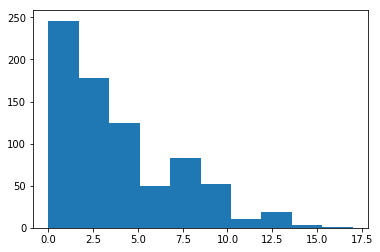

In [10]:
plt.hist(dataset['Pregnancies'],bins = 10)

(array([  4.,  19.,  87., 149., 161., 130.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

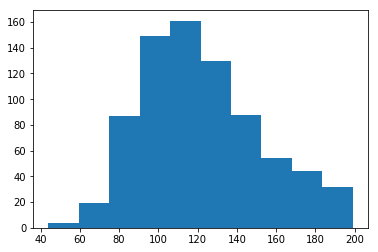

In [11]:
plt.hist(dataset['Glucose'],bins = 10)

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

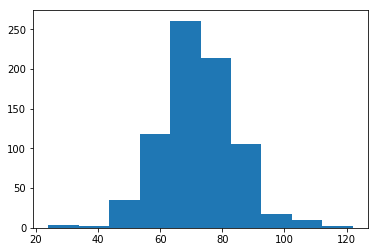

In [12]:
plt.hist(dataset['BloodPressure'],bins = 10)

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <a list of 10 Patch objects>)

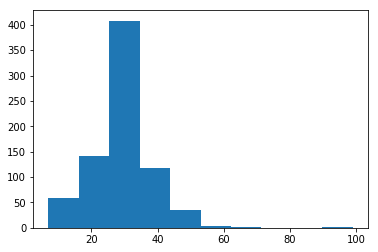

In [13]:
plt.hist(dataset['SkinThickness'],bins = 10)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

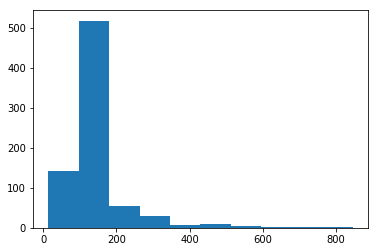

In [14]:
plt.hist(dataset['Insulin'],bins = 10)

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 10 Patch objects>)

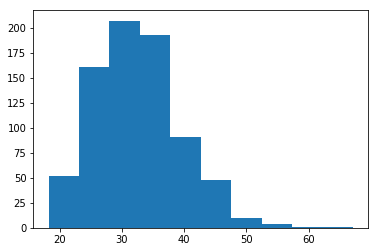

In [15]:
plt.hist(dataset['BMI'],bins = 10)

(array([ 14.,  49.,  89., 166., 126., 126., 115.,  55.,  21.,   7.]),
 array([-2.55104645, -2.20756505, -1.86408365, -1.52060225, -1.17712086,
        -0.83363946, -0.49015806, -0.14667666,  0.19680474,  0.54028614,
         0.88376754]),
 <a list of 10 Patch objects>)

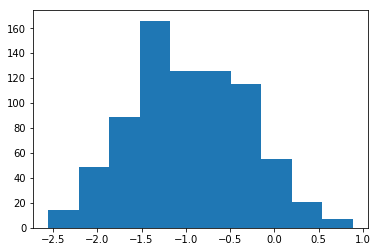

In [16]:
plt.hist(np.log(dataset['DiabetesPedigreeFunction']),bins = 10)

(array([219., 177.,  78.,  75.,  86.,  52.,  39.,  26.,  15.,   1.]),
 array([2.75892418, 2.91570663, 3.07248908, 3.22927154, 3.38605399,
        3.54283644, 3.6996189 , 3.85640135, 4.0131838 , 4.16996626,
        4.32674871]),
 <a list of 10 Patch objects>)

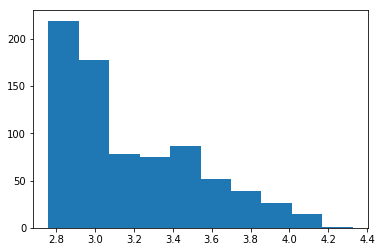

In [17]:
plt.hist(np.cbrt(dataset['Age']),bins = 10)

# Bivariate Analysis

In [18]:
corr = dataset.corr()
corr.style.background_gradient().set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.13,0.21,0.082,0.025,0.022,-0.034,0.54,0.22
Glucose,0.13,1,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1,0.19,0.045,0.28,-0.0028,0.32,0.17
SkinThickness,0.082,0.19,0.19,1,0.16,0.54,0.1,0.13,0.21
Insulin,0.025,0.42,0.045,0.16,1,0.18,0.13,0.097,0.2
BMI,0.022,0.23,0.28,0.54,0.18,1,0.15,0.026,0.31
DiabetesPedigreeFunction,-0.034,0.14,-0.0028,0.1,0.13,0.15,1,0.034,0.17
Age,0.54,0.27,0.32,0.13,0.097,0.026,0.034,1,0.24
Outcome,0.22,0.49,0.17,0.21,0.2,0.31,0.17,0.24,1


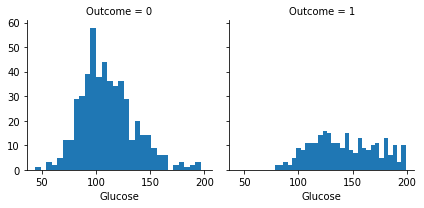

In [19]:
g = sns.FacetGrid(dataset,col = 'Outcome')
g.map(plt.hist,'Glucose',bins= 30)

In [20]:
print('Average pregnancies rate for positive class: '+str(dataset[dataset['Outcome']==1]['Pregnancies'].mean()))
print('Average pregnancies rate for negative class: '+str(dataset[dataset['Outcome']==0]['Pregnancies'].mean()))

Average pregnancies rate for positive class: 4.865671641791045
Average pregnancies rate for negative class: 3.298


In [21]:
print('Average Glucose level for positive class: '+str(dataset[dataset['Outcome']==1]['Glucose'].mean()))
print('Average Glucose level for negative class: '+str(dataset[dataset['Outcome']==0]['Glucose'].mean()))

Average Glucose level for positive class: 142.16557285655603
Average Glucose level for negative class: 110.71012057667103


In [22]:
print('Average BloodPressure rate for positive class: '+str(dataset[dataset['Outcome']==1]['BloodPressure'].mean()))
print('Average BloodPressure rate for negative class: '+str(dataset[dataset['Outcome']==0]['BloodPressure'].mean()))

Average BloodPressure rate for positive class: 75.14732442833579
Average BloodPressure rate for negative class: 70.93539699863577


In [23]:
print('Average SkinThickness for positive class: '+str(dataset[dataset['Outcome']==1]['SkinThickness'].mean()))
print('Average SkinThickness for negative class: '+str(dataset[dataset['Outcome']==0]['SkinThickness'].mean()))

Average SkinThickness for positive class: 31.686567164179106
Average SkinThickness for negative class: 27.726


In [24]:
print('Average Insulin rate for positive class: '+str(dataset[dataset['Outcome']==1]['Insulin'].mean()))
print('Average Insulin rate for negative class: '+str(dataset[dataset['Outcome']==0]['Insulin'].mean()))

Average Insulin rate for positive class: 164.70149253731344
Average Insulin rate for negative class: 127.792


In [25]:
print('Average BMI rate for positive class: '+str(dataset[dataset['Outcome']==1]['BMI'].mean()))
print('Average BMI rate for negative class: '+str(dataset[dataset['Outcome']==0]['BMI'].mean()))

Average BMI rate for positive class: 35.38475719158496
Average BMI rate for negative class: 30.888434346103004


In [26]:
print('Average DiabetesPedigreeFunction for positive class: '+str(dataset[dataset['Outcome']==1]['DiabetesPedigreeFunction'].mean()))
print('Average DiabetesPedigreeFunction for negative class: '+str(dataset[dataset['Outcome']==0]['DiabetesPedigreeFunction'].mean()))

Average DiabetesPedigreeFunction for positive class: 0.5505
Average DiabetesPedigreeFunction for negative class: 0.42973400000000017


In [27]:
print('Average Age for positive class: '+str(dataset[dataset['Outcome']==1]['Age'].mean()))
print('Average Age for negative class: '+str(dataset[dataset['Outcome']==0]['Age'].mean()))

Average Age for positive class: 37.06716417910448
Average Age for negative class: 31.19


# Data Modelling

In [28]:
X = dataset.drop(['Outcome'],axis =1)
y = dataset['Outcome']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [31]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier().fit(X,y)
dummy.score(X,y)

0.5442708333333334

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score

In [33]:
#Let's model  uncleaned data to compare results
Xu = dataset_copy.drop(['Outcome'],axis = 1)
yu = dataset_copy['Outcome']

In [34]:
#Modelling
scoring = 'roc_auc'
models = []
models.append(('LR',LogisticRegression()))
models.append(('SVM',SVC()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('AB',AdaBoostClassifier()))
models.append(('XGB',XGBClassifier()))

for name,model in models:
    kfold = KFold(random_state = 0,n_splits = 10)
    cv = cross_val_score(model,Xu,yu,scoring = scoring,cv = kfold)
    print('Algorithm: '+str(name))
    print('ROC score: '+str(cv.mean()))
    print('--'*30)

Algorithm: LR
ROC score: 0.823716379293716
------------------------------------------------------------
Algorithm: SVM
ROC score: 0.6511881577591094
------------------------------------------------------------
Algorithm: LDA
ROC score: 0.8286674580537227
------------------------------------------------------------
Algorithm: NB
ROC score: 0.8183362056817245
------------------------------------------------------------
Algorithm: KNN
ROC score: 0.7520031872613351
------------------------------------------------------------
Algorithm: CART
ROC score: 0.6542954232380651
------------------------------------------------------------
Algorithm: RF
ROC score: 0.7954581578051821
------------------------------------------------------------
Algorithm: AB
ROC score: 0.8175024937690673
------------------------------------------------------------
Algorithm: XGB
ROC score: 0.8292925408584588
------------------------------------------------------------


In [35]:
#Now let's model the cleaned datas
scoring = 'roc_auc'
models = []
models.append(('LR',LogisticRegression()))
models.append(('SVM',SVC()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('AB',AdaBoostClassifier()))
models.append(('XGB',XGBClassifier()))

for name,model in models:
    kfold = KFold(random_state = 0,n_splits = 10)
    cv = cross_val_score(model,X,y,scoring = scoring,cv = kfold)
    print('Algorithm: '+str(name))
    print('ROC score: '+str(cv.mean()))
    print('--'*30)

Algorithm: LR
ROC score: 0.8274823734847342
------------------------------------------------------------
Algorithm: SVM
ROC score: 0.6819594062222089
------------------------------------------------------------
Algorithm: LDA
ROC score: 0.8369044884535608
------------------------------------------------------------
Algorithm: NB
ROC score: 0.8168511658941806
------------------------------------------------------------
Algorithm: KNN
ROC score: 0.7683671235623712
------------------------------------------------------------
Algorithm: CART
ROC score: 0.6523475300380671
------------------------------------------------------------
Algorithm: RF
ROC score: 0.7841028554515972
------------------------------------------------------------
Algorithm: AB
ROC score: 0.8141773547987489
------------------------------------------------------------
Algorithm: XGB
ROC score: 0.8298271597390453
------------------------------------------------------------


In [36]:
#Logistic Regression
logistic = LogisticRegression().fit(X_train_scaled,y_train)
ypred_logistic = logistic.predict(X_test_scaled)
cm = confusion_matrix(y_test,ypred_logistic)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print('ROC Score: {}'.format(roc_auc_score(y_test,ypred_logistic)))
print('Recall Score: {}'.format(TP/(TP+FN)))
print('Precision Score: {}'.format(TP/(TP+FP)))
print('Specificity/TNR: {}'.format(TN/(TN+FP)))


ROC Score: 0.732258064516129
Recall Score: 0.5645161290322581
Precision Score: 0.7291666666666666
Specificity/TNR: 0.9


In [37]:
#Linear Discriminant Analysis
logistic = LinearDiscriminantAnalysis().fit(X_train_scaled,y_train)
ypred_lda = logistic.predict(X_test_scaled)
cm = confusion_matrix(y_test,ypred_lda)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print('ROC Score: {}'.format(roc_auc_score(y_test,ypred_lda)))
print('Recall Score: {}'.format(TP/(TP+FN)))
print('Precision Score: {}'.format(TP/(TP+FP)))
print('Specificity/TNR: {}'.format(TN/(TN+FP)))


ROC Score: 0.7241935483870968
Recall Score: 0.5483870967741935
Precision Score: 0.723404255319149
Specificity/TNR: 0.9


In [38]:
#XGBoost
logistic = XGBClassifier().fit(X_train,y_train)
ypred_xgb = logistic.predict(X_test)
cm = confusion_matrix(y_test,ypred_xgb)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print('ROC Score: {}'.format(roc_auc_score(y_test,ypred_xgb)))
print('Recall Score: {}'.format(TP/(TP+FN)))
print('Precision Score: {}'.format(TP/(TP+FP)))
print('Specificity/TNR: {}'.format(TN/(TN+FP)))


ROC Score: 0.7890818858560793
Recall Score: 0.6935483870967742
Precision Score: 0.7413793103448276
Specificity/TNR: 0.8846153846153846


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
#Oversampling the minor class and undersampling the majorclass
#Using Logistic Regression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=444, stratify=y)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Using pipeline to multiprocess the steps
pipe = Pipeline([('oversample',SMOTE(random_state = 444)),
                 ('log_reg',LogisticRegression(random_state = 444,n_jobs=-1))])

skf = StratifiedKFold(n_splits = 10)
param_grid = {'log_reg__C':[0.01,0.1,1,10,100],'log_reg__penalty':['l2','l1']}
grid = GridSearchCV(pipe,param_grid,scoring = 'roc_auc',cv = skf)
log = grid.fit(X_train,y_train)
print(grid.score(X_test,y_test))

print('Best params:', grid.best_params_)

ypred_log2 = log.predict(X_test)
cm = confusion_matrix(y_test,ypred_log2)
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]

print('Roc AUC score:',roc_auc_score(y_test,ypred_log2))
print('Confusion Matrix:\n',cm)
print('Recall:',TP/(TP+FN))
print('TNR:',TN/(TN+FP))
print('Precision:',TP/(TP+FP))
print('FPR:',FP/(FP+TN))
print('Accuracy:',accuracy_score(y_test,ypred_log2))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have

0.8414027919645897
Best params: {'log_reg__C': 0.1, 'log_reg__penalty': 'l1'}
Roc AUC score: 0.7673135852911134
Confusion Matrix:
 [[129  36]
 [ 22  67]]
Recall: 0.7528089887640449
TNR: 0.7818181818181819
Precision: 0.6504854368932039
FPR: 0.21818181818181817
Accuracy: 0.7716535433070866


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have

In [40]:
#Using Linear Discriminant Analysis
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=444, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pipe = Pipeline([('oversample',SMOTE(random_state = 444)),
                 ('lda',LinearDiscriminantAnalysis())])

skf = StratifiedKFold(n_splits = 10)
param_grid = {'lda__n_components':[1]}
grid = GridSearchCV(pipe,param_grid,scoring = 'roc_auc',cv = skf)
log = grid.fit(X_train,y_train)
print(grid.score(X_test,y_test))

print('Best params:', grid.best_params_)

ypred_lda = log.predict(X_test)
cm = confusion_matrix(y_test,ypred_lda)
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]

print('Roc AUC score:',roc_auc_score(y_test,ypred_lda))
print('Confusion Matrix:\n',cm)
print('Recall:',TP/(TP+FN))
print('TNR:',TN/(TN+FP))
print('Precision:',TP/(TP+FP))
print('FPR:',FP/(FP+TN))
print('Accuracy:',accuracy_score(y_test,ypred_lda))

0.8405856315968675
Best params: {'lda__n_components': 1}
Roc AUC score: 0.7625808648280558
Confusion Matrix:
 [[133  32]
 [ 25  64]]
Recall: 0.7191011235955056
TNR: 0.806060606060606
Precision: 0.6666666666666666
FPR: 0.19393939393939394
Accuracy: 0.7755905511811023


In [41]:
#As we see Logistic Regression yield better results, let's evaluate recall and plot roc curve using Logistic with SMOTE
log.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [42]:
log.predict_proba(X_test[0:10])

array([[0.6881682 , 0.3118318 ],
       [0.15497378, 0.84502622],
       [0.6487912 , 0.3512088 ],
       [0.89851781, 0.10148219],
       [0.87808271, 0.12191729],
       [0.82641177, 0.17358823],
       [0.21179064, 0.78820936],
       [0.72867803, 0.27132197],
       [0.62344115, 0.37655885],
       [0.19146265, 0.80853735]])

(array([36., 45., 27., 26., 25., 17., 15., 16., 25., 22.]),
 array([0.02117066, 0.1173524 , 0.21353414, 0.30971588, 0.40589762,
        0.50207935, 0.59826109, 0.69444283, 0.79062457, 0.88680631,
        0.98298805]),
 <a list of 10 Patch objects>)

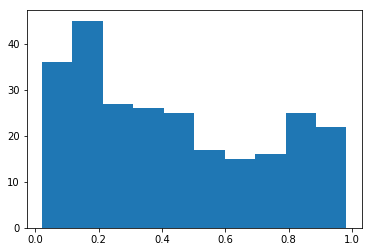

In [43]:
y_pred_proba = log.predict_proba(X_test)[:,1]
plt.hist(y_pred_proba,bins = 10)

In [44]:
#We are changing the threshold values to test by setting to 0.3
y_pred_proba = log.predict_proba(X_test)[:,1] > 0.3
print(log.predict(X_test[0:10]))
print(y_pred_proba[0:10]) # the values above will 0.3 will be classified as positive

[0 1 0 0 0 0 1 0 0 1]
[ True  True  True False False False  True False  True  True]


Text(0,0.5,'TPR')

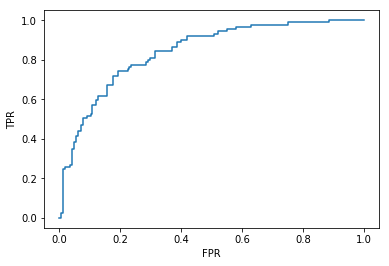

In [45]:
from sklearn.metrics import roc_curve
y_pred_prob1 = log.predict_proba(X_test)[:,1]
fpr, tpr, thersholds = roc_curve(y_test,y_pred_prob1)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [46]:
print('Roc score:',roc_auc_score(y_test,y_pred_prob1))

Roc score: 0.8405856315968675


In [47]:
from sklearn.cross_validation import cross_val_score
cross_val_score(log, X_train, y_train, cv=10, scoring='roc_auc').mean()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.8304763319469203